# Prep Devangari Data

I want to save my devangari fonts as single images like Capitals64.

In [1]:
import numpy as np
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import os

In [2]:
im = io.imread('./Capitals64/train/Arimo-Regular.0.0.png')

(64, 1664)


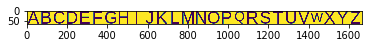

In [3]:
print(im.shape)
plt.imshow(im)

That's our target. Now let's loop over our fonts.

In [4]:
font_to_png_list = {}
letter_order= []
for root_dir in ('./devangari_fonts/devanagari/', './devangari_fonts/devanagari_new/'):
    for letter in os.listdir(root_dir):
        if letter not in letter_order: letter_order.append(letter)
        for font in os.listdir(root_dir + letter):
            font_name = font.split('_')[1].split('.')[0]
            if font_name not in font_to_png_list:
                font_to_png_list[font_name] = {}
            font_to_png_list[font_name][letter] = root_dir + letter + '/' + font

In [5]:
for root_dir in ('./devangari_fonts/uppercase_latin/', './devangari_fonts/uppercase_latin_new/'):
    for letter in os.listdir(root_dir):
        if letter not in letter_order: letter_order.append(letter)
        for font in os.listdir(root_dir + letter):
            font_name = font.split('_')[1].split('.')[0]
            if font_name not in font_to_png_list:
                font_to_png_list[font_name] = {}
            font_to_png_list[font_name][letter] = root_dir + letter + '/' + font

In [6]:
letter_order.sort()
print(letter_order)

out_dir = './devangari_fonts/full_fonts/'
train_dir = out_dir + 'train/'
valid_dir = out_dir + 'valid/'

font_order = list(font_to_png_list.keys())
np.random.shuffle(font_order)

for d in (out_dir, train_dir, valid_dir):
    if not os.path.exists(d):
        os.mkdir(d)
for i in range(len(font_order)):
    font = font_order[i]
    print(font)
    d = font_to_png_list[font]
    full_im = None
    for letter in letter_order:
        im = io.imread(d[letter])
        if full_im is None:
            full_im = im
        else:
            full_im = np.concatenate([full_im, im], axis=1)
    if i < 10:
        io.imsave(valid_dir + font + '.png', full_im)
    else:
        io.imsave(train_dir + font + '.png', full_im)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह']
Khula-ExtraBold
Halant-Light
Asar-Regular
Sura-Bold
Teko-SemiBold
Rajdhani-Light
Amiko-Bold
Glegoo-Regular
Mukta-Light
Tillana-Medium
Poppins-Regular
Poppins-ExtraLight
Khula-Light
Sumana-Bold
Karma-Bold
Halant-Bold
Laila-Regular
VesperLibre-Bold
Mukta-Medium
Laila-Medium
Halant-SemiBold
MartelSans-ExtraBold
Laila-Bold
Karma-Medium
InknutAntiqua-SemiBold
Sarpanch-Medium
Eczar-Bold
Karma-SemiBold
Kalam-Bold
InknutAntiqua-Bold
Laila-Light
Biryani-ExtraBold
Khula-Bold
Hind-SemiBold
Cambay-Italic
Yantramanav-Light
Ranga-Bold
Poppins-SemiBold
Palanquin-ExtraLight
VesperLibre-Black
Poppins-ExtraBoldItalic
MartelSans-Bold
Poppins-Black
Sarpanch-Bol

In [7]:
len(font_to_png_list)

174

### Prep Capitals64 data like that as well

This serves as a much larger test set

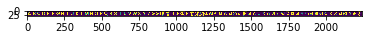

In [8]:
test_im = io.imread('./devangari_fonts/full_fonts/valid/Poppins-SemiBold.png')
test_im.shape
plt.imshow(test_im)

In [11]:
path = './Capitals64/test/'

out_dir = 'Capitals64_resized/'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
out_dir += 'test/'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for fname in os.listdir(path):
    im = 255 - io.imread(path + fname)
    im_rescaled = skimage.transform.resize(im, (im.shape[0] // 2, im.shape[1] // 2), 
                                           anti_aliasing=True, preserve_range=True)
    im_resized = np.zeros(test_im.shape, dtype='uint64')
    im_resized[:,:im_rescaled.shape[1]] += (im_rescaled).astype('uint64')
    
    io.imsave(out_dir + fname, im_resized)

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/firasanscondensed-eightitalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/MayflowerAntique.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Nemesia-italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/vtks alcalina.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/MiltonianTattoo-Regular.0.0.png is a low contrast image
  warn('%s is a low 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/firasanscondensed-mediumitalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/firasanscondensed-twoitalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Plasma15.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Cuivrerie-Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/chuck title font aug 2015-3.0.0.png is a low contrast image
  warn('%

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/OilBats.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/gather.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/JandaFabulous.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Love & Trust.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Harmaa Perkele.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/CarrickDancing.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Banksia-Black.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/ThrowMyHandsUpintheAirBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/LIBRIT__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Stilu-SemiBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/EddaOutline.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/MysteryQuest-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/galderglynn titling bk it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/LibrisADFStd-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Stilu-Light.0.0.png is a low contrast image
  warn('%s is a low contrast

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/TroglodyteNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Strebold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/vanished.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Cantika Cute Handwriting.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Mirage.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/an

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/alph.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/csar2I.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Rudiment.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Fight For Our Love (Bold) by Misti's Fonts.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Watermelon Script Demo.0.0.png is a low contrast image
  warn('%s is a low contrast imag

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/computer_7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/galderglynn titling bd.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/VTCSundaykomixBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/SlaterIndustrial.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/euphorigenic.0.0.png is a low contrast image
  warn('%s is a low contrast image' %

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/monogb__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/whipsnap.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/KGLETHERGOSOLID.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Corruptor-Clean-LDR.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Open your eyes.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/NimbusMono-Oblique.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/LibrisADFStd-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Lilian.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Rueck Left.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/JandaScrapgirlDots.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Cedarville Pnkfun 1 Print.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/JandaHideAndSeek.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Merriweather Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/JandaSparkleandShine.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Here we are now, entertain us.0.0.png is a low contrast image
  warn(

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/advanced_sans_serif_7_bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/ah-ha2.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/keyrialt.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Padaloma.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Kristi.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anacon

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/EuphoriaScript-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Roboto-Medium.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/gastroin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/LibrisADFStd-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/MadisonSquareNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Bitstream Vera Sans Mono Roman.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Tipos Pereira - LondrinaShadow-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/PajamaPants.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/chemreb.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/OverlockSC-Regular.0.0.png is a low contrast image
  warn('%s 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/MintSpirit-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Exo-Light-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Red October-Stencil.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/ToubibDemo-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/vtks tilt.0.0.png is a low contrast image
  warn('%s is a low contrast image' % 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Exo-Thin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/SFCovingtonSCExp-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/vtks scream.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/LADYCN__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Antique Book Cover.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/h

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Fingbanger.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/firasanscondensed-extralight.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/MadeInChina.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/EtharnigNo12.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/punched.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/h

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Gabriela-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Flanker Griffo Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Miniver-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Uechi Gothic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/no clocks.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fnam

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/velvenda chill.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/light_led_display-7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/miniquest.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/TPF Rubber Ducky.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/GilliusADFNo2-Cond.0.0.png is a low contrast image
  warn('%s is a low contrast image' % f

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Grinched.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/palitoon.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/gaposiso.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/lesser concern.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Hansa.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/pyt

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/vtks untitled.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Kids Book Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Bug Report.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/ninjutsuBB_bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Mustasurma.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sa

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/firasanscondensed-medium.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Cormorant-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Younger than me.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Goldmarie UNZ1T#.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/CRBLATRIAL.0.0.png is a low contrast image
  warn('%s is a low contrast image'

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Terrorism Bytes.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/MBAMBI__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/tearful.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Gaspar_Bold_Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/infmedia.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anac

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Hursheys.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/DOTCIRFUL Regular Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/FerroRosso.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/olivers barney.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/RxOZ__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sa

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/randyde.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/vipnagorgialla.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/ubiquity.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/NimbusMono-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Cordel Groteska Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/ho

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/PROMINDER Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/SFBeaverton-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/gravitat.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/Vollkorn-MediumItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/test/UpperWestSide.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

In [14]:
path = './Capitals64/train/'

out_dir = 'Capitals64_resized/'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
out_dir += 'train/'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for fname in os.listdir(path):
    im = 255 - io.imread(path + fname)
    im_rescaled = skimage.transform.resize(im, (im.shape[0] // 2, im.shape[1] // 2), 
                                           anti_aliasing=True, preserve_range=True)
    im_resized = np.zeros(test_im.shape, dtype='uint64')
    im_resized[:,:im_rescaled.shape[1]] += (im_rescaled).astype('uint64')
    io.imsave(out_dir + fname, im_resized)

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/JockeyOne-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sitdown.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PWChristmasfont.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Comme-Thin.0.0.png is a low contrast image
  warn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Gorditas-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/infini-gras.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/cretino.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Lekton-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mesmerize-cd-sb.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Vibrolator .0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/The Heart Maze Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Alphahate.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Maybe Pollock.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NeoGothisADFStd-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FontleroyBrownNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Gotisch Weiss b.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CHOLO___.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AdventPro-Thin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/This Is Ridiculous.0.0.png is a low contrast image
  warn('%s is a low contrast image' % f

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Caliban.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/daisy.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/teen lt.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Chispa.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/luc_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/si

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/infini-italique.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Exo2.0-Black.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFFlorencesansSCExp-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MOTORCYCLEEMPTINESS.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/VictoriaCAT.0.0.png is a low contrast image
  warn('%s is a low contrast 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mionta.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LADYIELO.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GLAUKOUS.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Molot.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CormorantUnicase-Medium.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaco

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NodeToNowhere.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/fanzine.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Kingthings Exeter.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFSquareHead-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Neuton-SC-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Smoolthan Bold-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sunshine in my Soul.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AmericanText.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGSecondChancesSketch.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/RedStateBlueStateBB_reg.0.0.png is a low contrast image
  warn('%s is 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/nk57-monospace-se-rg.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/bold_sans_serif_7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PlayfairDisplay-BlackItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/cleavttr.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Paranoid Orange.0.0.png is a low contrast image
  warn('%s is a low con

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFStarDustCondensed-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BernerBasisschrift2.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Plasma07.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/rotund.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ANKOR___.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/microfuture.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/DoergonBackshift.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Screaming Red 2.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/OleoScript-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/thiamine.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGIAndLoveAndYou.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FatFreddieContour.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/dichtmy.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Amatic-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/notalot35.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/h

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ABeeZee-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mixolydian titling lt.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/poke.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGLikeASkyscraperBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/My Big Heart Demo.0.0.png is a low contrast image
  warn('%s is a low contrast imag

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Parisienne-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/xeros_proof.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Monopol.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Kremlin Kommisar.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/military_font_7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sanidana.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/VTC-TribalThreeFree.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AccanthisADFStd-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/RothmanPlain.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFChaerilidae-Oblique.0.0.png is a low contrast image
  warn('%s is a low contras

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/makushkaQuadriga.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NEON CLUB MUSIC_bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MinstrelPosterTwoNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/VTKS Good Vibrations.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BaskervaldADFStd-Bold.0.0.png is a low contrast image
  warn('%s is 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sortefax_026.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Simple Kind Of Girl.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Typo Grotesk Rounded Light Italic Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFAutomaton-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Cagliostro-Regular.0.0.png is a low contrast image
  warn(

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MJDEG___.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFTattleTalesOutline-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/matrix code nfi.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Syawal Khidmat.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ENYO_Serif_light_italic.0.0.png is a low contrast image
  warn('%s is a low con

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Pozofour.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Cutie Patootie Skinny.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Cookie-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AccanthisADFStdNo3-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/stuntcroft.0.0.png is a low contrast image
  warn('%s is a low contrast ima

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Twelve Ton Goldfish.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TagsXtreme2.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/gyrose.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/JosefinSlab-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Fine Style.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MidCase BlackLine.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Alegreya-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/spacejunkXL.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/OpenSans-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GILGONT_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GlassAntiqua-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFBigWhiskey.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Zombie Queen 2.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Gatometrix.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/peach-sundress.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TypoSlab_italic_demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Rough Simple.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/The universe in a nutshell.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/pneumati.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Swanky and Moo Moo.0.0.png is a low contrast image
  warn('%s is a low contra

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/HerkulesContour.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/razor keen.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Staccatissimo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Green Dream.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Mordred-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/hom

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ShePaintsMeBlue.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CONTFU__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/entsans.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Herkules.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ethnocentric rg.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/an

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CHIZZWHO.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Dead end.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LSRegularAlt.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mesmerize-lt-it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Future TimeSplitters.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/h

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Playtime.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/square_pixel-7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SchmaleAnzeigenschrift.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AveriaSerifLibre-LightItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/STRSL___.0.0.png is a low contrast image
  warn('%s is a low contrast i

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AlegreyaSansSC-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CormorantSC-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GelPenHeavy.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Baron Kuffner.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/HumboldtFraktur-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Happy_brown_cat.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/wigsquig.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LANEUP__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/rvaturecu.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGTwoisBetterThanOne.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFFlorencesansSCCond-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Logofontik 4F-Regular Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GelDoticaJumpy.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NoticiaText-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/StoneStoryPlusp.0.0.png is a low contrast image
  warn('

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Avond_07.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PAROLE Script demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/emilio 20.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Brotherhood_Script.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/chawp.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/s

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/3 Times Recycled Old Newspaper.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AustieBostKittenKlub.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Our First Kiss.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Breakable.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mesmerize-ex-el-it.0.0.png is a low contrast image
  warn('%s is a low

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFFlorencesansSCCond-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/skrunch Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/6809 chargen.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGBehindTheseHazelEyes.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Grymmoire.0.0.png is a low contrast image
  warn('%s is a low contrast i

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/DSMarkerFelt.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Essays1743-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFAvondaleOutline-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FetteMikado.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/HOLLYWOOD STARFIRE.0.0.png is a low contrast image
  warn('%s is a low contrast

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/hieros-0926.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TMUnicorn.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Diner-Fatt.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFPhosphorusChloride.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/insane_affection_ldr.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LeningradDisco.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PWManuelfree.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/xirod.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Ships In The Night (Outline).0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Kemco Smooth Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MAX_____.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Telex-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LABTOPBI.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/HEIDH___.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/polla.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BPscript.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Quizma_Thin_Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Human Error Grim.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/DeStencilNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/dpcomic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/s

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/POLLUX9300.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/b-de-bonita-shadow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FONTCOIV.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SqueakyChalkSound.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NimbusSanL-RegIta.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/nk57-monospace-se-bd.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/JosefinSlab-SemiBoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/duepuntozero_bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sketch 3D.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Republica Minor 2.0.0.0.png is a low contrast image
  warn('%s is a low

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Tag Hand Graffiti Trash.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/stormfaze.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGFractions.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Crimson-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LongIsland-Shadow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/VTC Tribal Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Vtks Relaxing Blaze.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TengwarOptimeDiagon.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TrashCinemaBB_ital.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/kingsbridge sc bd.0.0.png is a low contrast image
  warn('%s is a low

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFFedoraShadow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/engebrechtre ex.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/zodillin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CAYETANI.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Archistico_Simple.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/ho

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TypographerGotischSchmuck-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Non watercolor.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Cronus Round.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TypoSlab_bold_demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Quirko Light.0.0.png is a low contrast image
  warn('%s is a low cont

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Garogier.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CatarataOne.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/side_k_bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sarina-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Pixel LCD-7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Cabin-BoldItalic-TTF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FjordOne-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFAvondaleSCInline-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TheDogAteMyHomeworkBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BalaCynwydNF.0.0.png is a low contrast image
  warn('%s is 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Tunnepinta.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FUTUP___.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/home sweet home outline.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Gidole-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Litos Script_BOLD Italic.0.0.png is a low contrast image
  warn('%s is a low contrast im

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LCD14Condensed.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/contour generator.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/gyparody hv.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/{PixelFlag}.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/I Never Learn.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFElectrotome-BoldOblique.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SignikaNegative-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BlackNight.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BPdotsDiamondBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Doergon.0.0.png is a low contrast image
  warn('%s is a low contrast i

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/beon-webfont.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Kingthings Poppalok.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BoogieNightsNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Andada-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Luna-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' %

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Florsn20.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GRUNTREAPER.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Strawberry Muffins Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Zebra.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Martell-Normal.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/hom

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/nk57-monospace-se-sb-it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/athabasca-ex-bk-it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Ancient God.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Beer Goggles.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Creature Feature.0.0.png is a low contrast image
  warn('%s is a low contrast i

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Niconne-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mesmerize-sc-eb-it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFFlorencesansComp-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sun zoom spark.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/pyrite.0.0.png is a low contrast image
  warn('%s is a low contrast ima

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Holitter_Lines.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFOldRepublicSC-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/VeryChristmess.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CoventryGarden.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SWStaffMeeting.0.0.png is a low contrast image
  warn('%s is a low contrast image

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Ganton.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/HALTER__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Genome-Thin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Typo_Round_Thin_Italic Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/nk57-monospace-se-bk.0.0.png is a low contrast image
  warn('%s is a low contrast image' % 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Death Star.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Coda-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/gm italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/wagerlos.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/combusti.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Aaargh.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFFedoraOutline.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Human Being.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sablon_Up_College_Alt.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ParafuseShadow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/32768no.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Dalmais.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Mate-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/VTC-SumiSlasherOneItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CormorantUnicase-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Tannenberg-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFIntermosaicB-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Miss Ellen.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/cargoplaindemo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Quicksand_Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Marske.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Passing Notes.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Billboard-College.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SSAMTRIAL.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Decalotype-Medium.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/ho

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Namskin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MavenPro-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/elizajane.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mesmerize-ex-lt-.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/REP5EXP_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/an

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Elb-Tunnel Schatten.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mishmash.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CormorantUpright-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Italipixel.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BrownwoodNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Kulkeuma.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Germano-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FREEBSC_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/orangefizz.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/cardigan titling rg.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sa

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KontrapunktLightItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Hackney Block Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ShakingSalsa.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/awesome_java.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/XRAYTEDSKEW.0.0.png is a low contrast image
  warn('%s is a low contrast imag

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/good times rg.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PerspectiveSans-BlackItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Dogma.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LindbergHand.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CHIZZW__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ChromeYellowNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Typo_College_LC_Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/[TOP_SECRET].0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NotoSerif-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/texgyreheros-bold.0.0.png is a low contrast image
  warn('%s is a low contrast i

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/not_sure_if_weird_or_just_regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GlacialIndifference-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/bloodandblade_outilne.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Ubuntu-M.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/WiegelKurrent.0.0.png is a low contrast image
  warn('%s 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/HopefulGiraffe-Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/goonspectre_tbs bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Xaligraphy BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/volatil2.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/uralita-fina.0.0.png is a low contrast image
  warn('%s is a low contrast i

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Feel the universe.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sketch College.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ComingSoon.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/EBGaramond08-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BOOTERFF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fnam

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ElectrumADFExp-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AlegreyaSansSC-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ClearSans-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Lazarus Oz Syndfri.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Saniretro.0.0.png is a low contrast image
  warn('%s is a low co

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/spheroix.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Old Scribe.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Fortunaschwein_complete.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGOnlyHope.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LABMIX__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFGothicanCondensed-BoldObl.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sunflower Harvest.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LibreBodoni-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/RalewayDots-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Razalgur.0.0.png is a low contrast image
  warn('%s is a low con

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mixolydian titling rg.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/The Urban Way Thin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Akaju_Thin_demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ASSEENONTVSKEW.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Adine Kirnberg.0.0.png is a low contrast image
  warn('%s is a low contrast

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LANENAR_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FONTCIII.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Zensyrom.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GlacialIndifference-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/DigitalStripBB_Ital.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/avocado_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/USSR STENCIL.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/edmunds distressed.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Movavi Grotesque Black Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AlegreyaSansSC-ExtraBoldItalic.0.0.png is a low contrast image
  warn('%s is

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Chivo-Black.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Have nothing to do with.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Xsotik.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TerminalDosis-Medium.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Solothurn-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PetitFormalScript-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/wet pet.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFPlasmatica.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Volute.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Dotrice-Condensed.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Rosario-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Ficticcia College.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KrumkakeBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Dustismo_Roman_Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Blankenburg.0.0.png is a low contrast image
  warn('%s is a low contrast image' % f

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ChangaOne-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Deborah Condensed.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Sadannes.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/VTC Embrace.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Judson-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/xtrusion.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/RITABD__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AccanthisADFStdNo2-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AMGaea.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/southpaw.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Luna-ExtraBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Send me a postcard.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Savor.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Wantedo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BerenisADFPro-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BowlbyOneSC-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/DragonbonesBB_ital.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NASDAQER.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Zag Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/akaDora.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/credit valley bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Woodwarrior-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Spiders.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Torture, Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Metamorphous-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast ima

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Bobbleboddy_light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFBurlingtonScript-BoldItal.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Is that clear.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGBeStillAndKnow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Scratch X.0.0.png is a low contrast image
  warn('%s is a low contrast

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Maxxi Serif Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Prida01Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mesmerize-ex-rg-it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/kawoszeh.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Move-X Light Italic demo.0.0.png is a low contrast image
  warn('%s is a low contrast ima

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/almonte.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mincer.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Cordel_Encarnado I.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Charruff.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/RopaSans-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/a

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Stage.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/fanwood-webfont.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Asap-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Insert your name here.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Kingthings Facetype.0.0.png is a low contrast image
  warn('%s is a low contrast image' % 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Holitter_Gothic(BETA).0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SF Solar Sailer Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Deavantgar.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/relish gargler.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/kingsbridge bd it.0.0.png is a low contrast image
  warn('%s is a low contrast

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Nicotine Stains.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/DIGITALDREAMSKEW.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ParsonsShadow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TYPO_COMICS_italic_demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Chroma Ghost.0.0.png is a low contrast image
  warn('%s is a low contrast im

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/YanoneKaffeesatz-Thin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFFedoraTitlesShadow-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PWScratchy.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Hitch-hike.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Zentb___.0.0.png is a low contrast image
  warn('%s is a low contrast image

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/akaChen.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Fewt Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MacondoSwashCaps-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Marker.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Bilbo-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Resagokr.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Pentagon.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/uglyhandwriting.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFGothican-Oblique.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TANTRUMTONGUE.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/ho

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/sorrier_statements.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CodePredators-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CollegeTMShadow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PreussischeVI9Ag2SchattenLinie.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/kingsbridge ex sb it.0.0.png is a low contrast image
  warn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LibreBodoni-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/5yearsoldfont.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Vengeance.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Mesa Grande.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/jakob_sc.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFActionMan.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KARNIVBL.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Dark Underground.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/JosefinSans-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Pelkistettya todellisuutta.0.0.png is a low contrast image
  warn('%s is a low contrast im

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Hurufo & Numero.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/disco_7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/xero4.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/orbitron-light-webfont.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Medici Text.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Cactus Tequila.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/hpunk.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Phorssa.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/meloche-bk.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Gasrux.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/STRSLOU_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AlmendraSC-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Da Sei Nei.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/RxZO__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PassionOne-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFIntoxicatedBlues-BoldObli.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFQuartziteShaded-Oblique.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MOON30__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/nk57-monospace-ex-lt.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LinBiolinum_RBah.0.0.png is a low contrast image
  warn('%s is 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Indulta-SemiSerif-Bold-Italic-FFP.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Typo College Shining Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/almonte woodgrain.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TypographerRotunda.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/5thgradecursive-2-italic.0.0.png is a low contrast

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/davis.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Blackfat Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Shark Attack.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Tibet.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/texgyreschola-bolditalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Arimo-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGShadowOfTheNight.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/squishy.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/RomajiMincho.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CryptCreep BB_reg.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/combustw.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFRetroSpliceSCOutline.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FontdinerdotcomSparkly.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LovedbytheKing.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Filamental.0.0.png is a low contrast image
  warn('%s is a low contrast image

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/JosefinSans-SemiBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Rhino Luz.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Rudelsberg-Plakatschrift.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/kingsbridge sc el it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Oxygen-Regular.0.0.png is a low contrast image
  warn('%s is a low con

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Rediscovered.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Saltpeter N Fungus.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/beltway-prophecy-irregular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Joyful Juliana.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Akong_agi.0.0.png is a low contrast image
  warn('%s is a low contrast im

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/futura_light-webfont.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Lekton-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/nk57-monospace-ex-eb.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Coving14.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/strenuous bl.0.0.png is a low contrast image
  warn('%s is a low contrast image' %

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LCD14.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Glamor-MediumItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/texgyretermes-bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFFourcheCondensed.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/zephyr_jubilee.0.0.png is a low contrast image
  warn('%s is a low contrast image' 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NAL Hand.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/FrederickText.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Paljain jaloin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ComicJens-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Relief BD.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/s

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MyLuckyPenny.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/DEVROYSC.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/autodestructbb_bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/On the horizon.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/wunderbar.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/ho

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Coentgen_Kanzley.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/lucid2o.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/POULTRYG.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFAvondaleInline-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ThirstyScriptExtraBoldDemo.0.0.png is a low contrast image
  warn('%s is a low contrast i

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Street Corner Slab Extend.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Typo_Comica_outline_demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Marvel-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SpeedballNo2NF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ahellya.0.0.png is a low contrast image
  warn('%s is a low con

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/autodestructbb_reg.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NimbusSanL-BolIta.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFTattleTales-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/A Box For 2.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Rajdhani-Bold.0.0.png is a low contrast image
  warn('%s is a low contras

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/goodfish bd it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MidCase BlackSolid.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Lancelot-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/spinwerad.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/REPUB3I_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Orkney-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/syracuse.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Days Sans Black.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFEspressoShack-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/EncodeSansWide-100-Thin.0.0.png is a low contrast image
  warn('%s is a low contrast i

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KIMONOGI.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Thirteen-Pixel-Fonts.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GovtAgentBB.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Final Gambit.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/miama.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Dupuy.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Requiem for A.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/AveriaLibre-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GuinnessExtraStoutNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Capture it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/sybil green.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MerriweatherSans-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/gloriahallelujah.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFArborcrestMedium-Oblique.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/A-cuchillada-font-ffp.0.0.png is a low contrast image
  warn('%s is 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Blogger Sans-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/quadaptor.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFPaleBottomShaded.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/f1-secuencia-quad-ffp.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LibbyHeavy.0.0.png is a low contrast image
  warn('%s is a low contrast image

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Your Royal Majesty Fancy.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/GLARESOME Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/blambotcustom.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Comme-Medium.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TheDogAteMyHomeworkBoldItal.0.0.png is a low contrast image
  warn('%s is a l

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Typo College Rocking Rounded Demo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFFlorencesansShaded-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Trocchi-Bold-Stencil.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Jazz Zebra.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MagicLanternNF.0.0.png is a low contrast image
  warn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ProstoOne-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/LowerEastSideLefty.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TribunADFStd-BoldCond.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFWasabiCondensed-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Siti Maesaroh.0.0.png is a low contrast image
  warn('%s is a low

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ROADWAY_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/cyrillic_pixel-7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/rm_tubeway_chrome.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PLAYSIR Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Phoss___.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGFallForYouItalics.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Days.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Simonetta-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/degrassi back.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/notalot25.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/hom

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/outersid.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/mesmerize-se-eb-it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFSynthonicPop-BoldOblique.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NegativeSpace.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/ankecallig-fg.0.0.png is a low contrast image
  warn('%s is a low contrast ima

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TypographerTextur-Schatten.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Metropolis-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KOMTXTKB.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Junicode-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CactusSandwich.0.0.png is a low contrast image
  warn('%s is a low contras

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/revertro.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Prida36.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Daniel-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Xolonium-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Florsn03.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaco

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/binxchr.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Comic Gibi Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/texgyretermes-italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Aspergit Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/progbot.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Gipsiero Kracxed.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/styrofoam feelings.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Kenney Rocket.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/My First Crush Hollow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Beta54.0.0.png is a low contrast image
  warn('%s is a low contrast image' 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Jiggery Pokery.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Kingthings Wrecktangle.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Humectez La Mouture.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Cyclin__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Babelfish.0.0.png is a low contrast image
  warn('%s is a low contrast image' % 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BiedermeierKursiv.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Antonio-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Volkhov-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Hello Finland.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BurgerDoodleTwoNF.0.0.png is a low contrast image
  warn('%s is a low contrast imag

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Zubajda Grng.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/HDONTRIAL.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PWSerifScratch.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/PassionOne-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/EmpireStateNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/h

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Crimson-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFHollywoodHillsCondensed.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/HerkulesShadow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/sundaycomicsbb_bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/comic_andy.0.0.png is a low contrast image
  warn('%s is a low cont

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGPrimaryLinedNOSPACE.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Snaps Taste Outline.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NauertWd-Plain.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Zdyk Scorpio.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Lumberjack Rough.0.0.png is a low contrast image
  warn('%s is a low contrast

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/KGSaySomething.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/xolto.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Fonarto.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Federo-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/thrownupreal.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/ana

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/HeavyTrippNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Comprehension-Dark.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/OldEnglishFive.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/BulletproofBB_ital.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MAXWELL BOLD.0.0.png is a low contrast image
  warn('%s is a low contrast image' 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Unna-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/crystal radio kit.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/MightyZeo.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TribunADFStd-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/TheDogAteMyHomework.0.0.png is a low contrast image
  warn('%s is a low contrast image' 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Coving11.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Amaranth-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/wobbly.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Kanover Free.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Neuton-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anac

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/texgyreadventor-bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/VTKS skulls.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/WildRideBackfill.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFTechnodelight-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Georgia Belle Skinny.0.0.png is a low contrast image
  warn('%s is a l

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/technet.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/one47.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Decalotype-ExtraBold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/Slasha.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/small_bold_pixel-7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/CopaseticNF-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/SFBigWhiskeyExtended.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/NickleyNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/hillock.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/train/StudebakerNF-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fna

In [15]:
path = './Capitals64/val/'

out_dir = 'Capitals64_resized/'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
out_dir += 'valid/'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for fname in os.listdir(path):
    im = 255 - io.imread(path + fname)
    im_rescaled = skimage.transform.resize(im, (im.shape[0] // 2, im.shape[1] // 2), 
                                           anti_aliasing=True, preserve_range=True)
    im_resized = np.zeros(test_im.shape, dtype='uint64')
    im_resized[:,:im_rescaled.shape[1]] += (im_rescaled).astype('uint64')
    
    io.imsave(out_dir + fname, im_resized)

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Sitdown.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Kremlin Advisor.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/VTC-KomikSkans-One.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/titlewv.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/KARNIVOT.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ccapshad.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/AmaticSC-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Animals are like people.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SFZeroGravityCondensed-Bol1.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Sustainable Amazon II.0.0.png is a low contrast image
  warn('%s is a lo

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Smoolthan Bold-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Sunshine in my Soul.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Hug Me Tight.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/EBGaramond08-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/VTC-SumiSlasherOneSkinned.0.0.png is a low contrast image
  warn('%s is

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/texgyreschola-regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Comfortaa-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/KGIAndLoveAndYou.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/FatFreddieContour.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Guazhiru Italic.0.0.png is a low contrast image
  warn('%s is a low contras

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Prida01Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Freeride.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/KANDIDW_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/USENET_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Arvo-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anacon

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/LABTUUP_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/FatFreddieShadow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/LABTUWD_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ZILLMOO_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/High-Marker-Flat.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/acid_bold_italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Nonchalant Love.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ApexLake-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/VTKS CHIP SET.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/edosz.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Billboard-Stripped.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/OriginalSurfer-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/CormorantSC-Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ripTRASHcutMIRROR.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Scada-BoldItalic.0.0.png is a low contrast image
  warn('%s is a low 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SFSquareHead-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/MutterKrauseNormal.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Portmanteau-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Oslo_II_Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/astron boy video.0.0.png is a low contrast image
  warn('%s is a low contrast

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/BFONDTRIAL.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ripTAPE.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SFDigitalReadout-Heavy.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/FashionVictim.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/konecto1.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/arsenale_white.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Dust Serif.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Typistys DIRT.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Coving03.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Slave only dreams to be king.0.0.png is a low contrast image
  warn('%s is a low contrast image' %

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/hemi head bd it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/forgetmenot.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/KARNIVOF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Tall Films Expanded.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/BalaCynwydNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Hidden Zebra.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/misirlou day.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Supermolot Light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/acid_bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/gapstown-b.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/makefunofmeDEMO.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ghostmeat back.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/eden mills bd it.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Raw-Denim-Audacity.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/zincboom.0.0.png is a low contrast image
  warn('%s is a low contrast image' % f

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/siamese.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Dyer Arts and Crafts.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/trans___.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Rhyder.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/bold_led_board-7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sa

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/VTKS HIGHLIGHT 2.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Baldur.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Charstrwn.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/texgyreschola-italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/MutantAcademyBB.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SFPlanetaryOrbiterOutline-I.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/eminenz.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Montepetrum Thin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/KGINeedAFont.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/huxtable.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ParafuseOutline.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ASSEENONTVSKEW.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/FatCow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Futura_regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Kremlin Minister Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fn

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Kirvy-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Rosario-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Rush minute.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/CabaretShadow.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/lemon.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/a

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/gang_wolfik.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Alegreya-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SinkinSans-400Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SelznickRemixNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/GetVoIP Grotesque.0.0.png is a low contrast image
  warn('%s is a low contrast imag

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Nue_medium.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/JAGZ____.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/TH3 MACHINE.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/LABTUSW_.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SinkinSans-100Thin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Fewt Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Verano.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/TROGLO__.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/advanced_pixel_lcd-7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/VTKS URBAN TIME 3d.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/hom

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/NamesakeNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Always Together.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SFHollywoodHillsCondensed-I.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Lastwaerk light.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Florsn23.0.0.png is a low contrast image
  warn('%s is a low contrast image'

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Torture, Dark.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SaucerBB.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Indulta-SemiSerif-Bold-Italic-FFP.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/TypographerRotunda.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/EncodeSansNormal-100-Thin.0.0.png is a low contrast image
  warn('%s is

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/neuropol.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Montepetrum regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/dyspepsia.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Schampel.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SFDigitalReadout-HeavyObliq.0.0.png is a low contrast image
  warn('%s is a low contrast image' % f

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Thin Pencil Handwriting.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Boecklins Universe.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/PopulationZeroBB.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Doriel.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SunshineKiddyFont.0.0.png is a low contrast image
  warn('%s is a low contrast i

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/loveletters.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SFPlasmaticaExt-Italic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/March of the pigs.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SFActionManExtended-BoldIta.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ripTRASHround.0.0.png is a low contrast image
  warn('%s is a low 

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SkittlesnBeerNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/MutantAcademyDCBB.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Typistys.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Yakap.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ChalkLine-Outline.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/ho

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Ananda Hastakchyar.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SignikaNegative-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/JoostAMillionaireNF.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/BebasNeue.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/A-Space Heavy Demo.0.0.png is a low contrast image
  warn('%s is a low contra

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/DrSugiyama-Regular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/serif_led_board-7.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Coving05.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/AarcoverRegular.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/obstacll.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/OpenSans-CondLightItalic.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/irezumi.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Berolina.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Oswald-Bold.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Nomitais.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/s

/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/SFFlorencesansSCShaded-Ital.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/breamcatcher.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/Wolves and Raven.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/NinjaPenguin.0.0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/sam/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: Capitals64_resized/valid/ReynoldContour.0.0.png is a low contrast image
  warn('%s is a low contrast 

In [48]:
np.histogram(test_im)

(array([50005,   592,   788,   416,  1120,   842,   388,   422,   573,
        16534]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

### Make a test_dict pkl file

They use a pickled test_dict to control which letters are left in for test runs. I can make it always give all the latin letters.

In [52]:
import pickle

In [63]:
their_dict = pickle.load(open('./Capitals64/test_dict/dict.pkl', 'rb'), encoding='latin1')

In [59]:
my_dict = {}
for key in their_dict.keys():
    my_dict[key] = np.arange(26,70)

In [65]:
if not os.path.exists('./Capitals64_resized/test_dict/'):
    os.mkdir('./Capitals64_resized/test_dict/')
pickle.dump(my_dict, open('./Capitals64_resized/test_dict/dict.pkl', 'wb'), protocol=2)

In [64]:
their_dict

{'gaposiso.0.0.png': array([15, 14,  6, 11, 23,  2,  9, 22, 19,  8, 18, 16,  3, 10,  0,  1, 13,
        20, 24, 17, 21,  7,  5,  4, 12, 25]),
 'Panton-BlackitalicCaps.0.0.png': array([ 3,  2, 16,  9, 23, 24, 19, 25,  4,  7, 22,  8, 13, 14, 17, 11,  0,
        21, 20, 10, 18, 15,  1,  5, 12,  6]),
 'Qokipops free.0.0.png': array([25,  0,  4,  5,  9,  8, 13, 22, 18,  3, 12, 24, 20, 11, 17, 10, 16,
        19,  1,  7,  6,  2, 23, 14, 21, 15]),
 'LibreFranklin-Light.0.0.png': array([15, 19, 13, 14,  3,  7,  5, 12, 25,  0, 20, 24, 18,  8,  2, 11,  9,
        17, 10, 21, 22, 16,  4,  6, 23,  1]),
 'FargoFaroNF.0.0.png': array([ 7, 13, 23,  2, 15, 14, 21, 18,  3,  4,  1, 16, 20,  8, 19,  0, 17,
         5, 24, 10, 22, 11,  9, 25, 12,  6]),
 'RxOO__.0.0.png': array([11,  5, 20, 12,  1,  9,  8, 23,  3, 19,  2, 14,  0, 25, 13, 18, 17,
        22,  7, 16, 21, 24,  6,  4, 15, 10]),
 'inglobalbi.0.0.png': array([ 4,  7, 13, 20, 17, 23, 24, 19, 14,  3,  5,  2, 25, 12,  6,  1, 11,
        10,  8, 16,